## 範例重點
* 學習如何在 keras 中加入 reduce learning rate
* 知道如何設定 reduce_lr 的監控目標
* 比較使用有無使用 reduce_lr 時的 performance

In [14]:
import os
import keras

In [15]:
train, test = keras.datasets.cifar10.load_data()

In [16]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [17]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [18]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [19]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [20]:
"""
# 載入 Callbacks, 並設定監控目標為 validation loss
"""
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(factor=0.5, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=5, 
                              verbose=1)

In [21]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[reduce_lr]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512 

Epoch 44/50
50000/50000 [==============================] - 10s 208us/step - loss: 0.7689 - accuracy: 0.7567 - val_loss: 1.4700 - val_accuracy: 0.5014
Epoch 45/50
50000/50000 [==============================] - 12s 240us/step - loss: 0.7674 - accuracy: 0.7578 - val_loss: 1.4713 - val_accuracy: 0.5003
Epoch 46/50
50000/50000 [==============================] - 24s 472us/step - loss: 0.7670 - accuracy: 0.7585 - val_loss: 1.4706 - val_accuracy: 0.5012
Epoch 47/50
50000/50000 [==============================] - 27s 546us/step - loss: 0.7654 - accuracy: 0.7597 - val_loss: 1.4712 - val_accuracy: 0.5031

Epoch 00047: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Epoch 48/50
50000/50000 [==============================] - 17s 346us/step - loss: 0.7634 - accuracy: 0.7592 - val_loss: 1.4708 - val_accuracy: 0.5030
Epoch 49/50
50000/50000 [==============================] - 16s 320us/step - loss: 0.7614 - accuracy: 0.7602 - val_loss: 1.4713 - val_accuracy: 0.5017
Epoch 50/50
50000/5

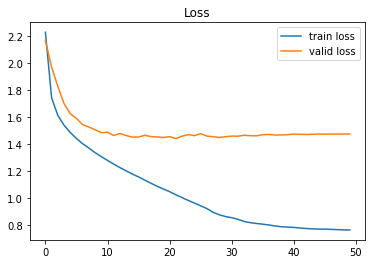

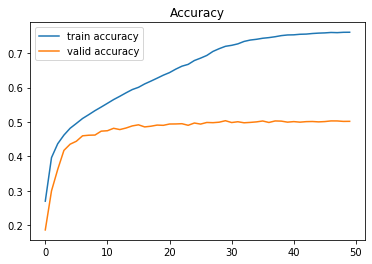

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

### patience = 10,其餘不變

In [23]:
reduce_lr = ReduceLROnPlateau(factor=0.5, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=10, 
                              verbose=1)

In [24]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[reduce_lr]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_15 (Batc (None, 128)               512 

Epoch 45/50
50000/50000 [==============================] - 31s 618us/step - loss: 0.6835 - accuracy: 0.7887 - val_loss: 1.5219 - val_accuracy: 0.5004
Epoch 46/50
50000/50000 [==============================] - 32s 637us/step - loss: 0.6788 - accuracy: 0.7899 - val_loss: 1.5267 - val_accuracy: 0.4990
Epoch 47/50
50000/50000 [==============================] - 36s 726us/step - loss: 0.6736 - accuracy: 0.7930 - val_loss: 1.5270 - val_accuracy: 0.5023
Epoch 48/50
50000/50000 [==============================] - 27s 546us/step - loss: 0.6692 - accuracy: 0.7955 - val_loss: 1.5269 - val_accuracy: 0.5011
Epoch 49/50
50000/50000 [==============================] - 24s 482us/step - loss: 0.6640 - accuracy: 0.7967 - val_loss: 1.5332 - val_accuracy: 0.4990

Epoch 00049: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 50/50
50000/50000 [==============================] - 36s 714us/step - loss: 0.6559 - accuracy: 0.7990 - val_loss: 1.5344 - val_accuracy: 0.5014


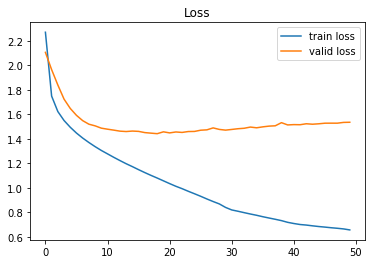

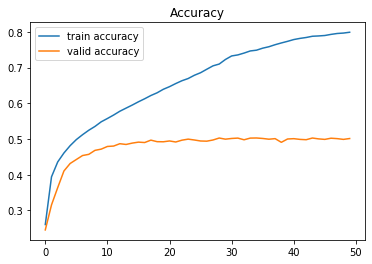

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()


### factor = 0.75,其餘不變

In [31]:
reduce_lr = ReduceLROnPlateau(factor=0.75, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=10, 
                              verbose=1)

In [32]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[reduce_lr]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_19 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_20 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_21 (Batc (None, 128)               512 

Epoch 45/50
50000/50000 [==============================] - 18s 368us/step - loss: 0.6078 - accuracy: 0.8193 - val_loss: 1.5830 - val_accuracy: 0.4933
Epoch 46/50
50000/50000 [==============================] - 18s 358us/step - loss: 0.5973 - accuracy: 0.8228 - val_loss: 1.5762 - val_accuracy: 0.4953
Epoch 47/50
50000/50000 [==============================] - 19s 377us/step - loss: 0.5888 - accuracy: 0.8280 - val_loss: 1.5857 - val_accuracy: 0.4987
Epoch 48/50
50000/50000 [==============================] - 20s 406us/step - loss: 0.5764 - accuracy: 0.8306 - val_loss: 1.5847 - val_accuracy: 0.4953
Epoch 49/50
50000/50000 [==============================] - 19s 380us/step - loss: 0.5656 - accuracy: 0.8371 - val_loss: 1.5968 - val_accuracy: 0.4964
Epoch 50/50
50000/50000 [==============================] - 20s 405us/step - loss: 0.5569 - accuracy: 0.8390 - val_loss: 1.6044 - val_accuracy: 0.4947


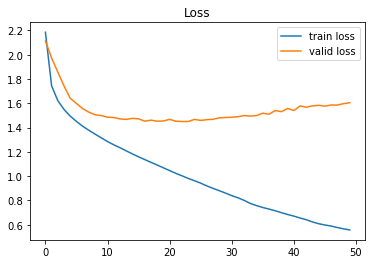

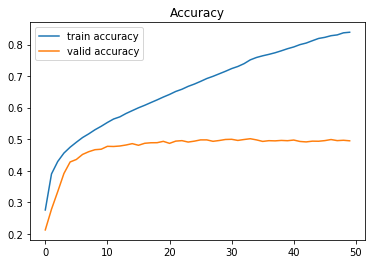

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()


### Optimizer = Adam,其餘不變

In [34]:
reduce_lr = ReduceLROnPlateau(factor=0.5, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=5, 
                              verbose=1)

In [35]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[reduce_lr]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_22 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_23 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_24 (Batc (None, 128)               512 

50000/50000 [==============================] - 10s 207us/step - loss: 0.1445 - accuracy: 0.9817 - val_loss: 1.9318 - val_accuracy: 0.5242
Epoch 44/50
50000/50000 [==============================] - 11s 212us/step - loss: 0.1432 - accuracy: 0.9820 - val_loss: 1.9298 - val_accuracy: 0.5214
Epoch 45/50
50000/50000 [==============================] - 10s 208us/step - loss: 0.1422 - accuracy: 0.9820 - val_loss: 1.9398 - val_accuracy: 0.5206

Epoch 00045: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
Epoch 46/50
50000/50000 [==============================] - 10s 208us/step - loss: 0.1389 - accuracy: 0.9832 - val_loss: 1.9339 - val_accuracy: 0.5254
Epoch 47/50
50000/50000 [==============================] - 10s 209us/step - loss: 0.1378 - accuracy: 0.9829 - val_loss: 1.9375 - val_accuracy: 0.5220
Epoch 48/50
50000/50000 [==============================] - 10s 207us/step - loss: 0.1362 - accuracy: 0.9842 - val_loss: 1.9444 - val_accuracy: 0.5225
Epoch 49/50
50000/50000 [=====

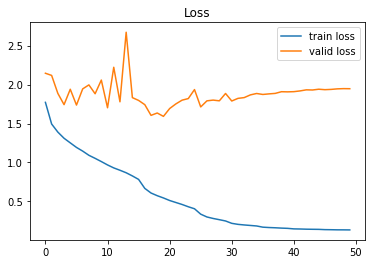

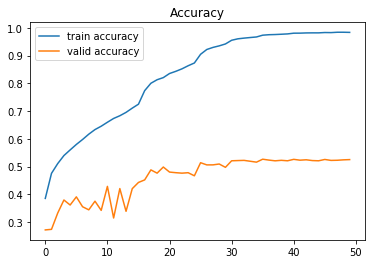

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()


### Optimizer = RMSprop,其餘不變

In [37]:
reduce_lr = ReduceLROnPlateau(factor=0.5, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=5, 
                              verbose=1)

In [38]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.RMSprop(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[reduce_lr]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_25 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_26 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_27 (Batc (None, 128)               512 

50000/50000 [==============================] - 10s 202us/step - loss: 0.4396 - accuracy: 0.8736 - val_loss: 1.5446 - val_accuracy: 0.5319
Epoch 43/50
50000/50000 [==============================] - 10s 201us/step - loss: 0.4398 - accuracy: 0.8734 - val_loss: 1.5453 - val_accuracy: 0.5300

Epoch 00043: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
Epoch 44/50
50000/50000 [==============================] - 10s 198us/step - loss: 0.4360 - accuracy: 0.8756 - val_loss: 1.5436 - val_accuracy: 0.5312
Epoch 45/50
50000/50000 [==============================] - 10s 200us/step - loss: 0.4347 - accuracy: 0.8762 - val_loss: 1.5459 - val_accuracy: 0.5317
Epoch 46/50
50000/50000 [==============================] - 10s 200us/step - loss: 0.4336 - accuracy: 0.8765 - val_loss: 1.5474 - val_accuracy: 0.5308
Epoch 47/50
50000/50000 [==============================] - 10s 200us/step - loss: 0.4326 - accuracy: 0.8765 - val_loss: 1.5488 - val_accuracy: 0.5314
Epoch 48/50
50000/50000 [======

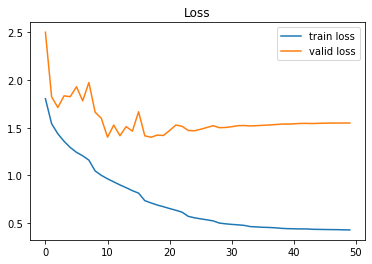

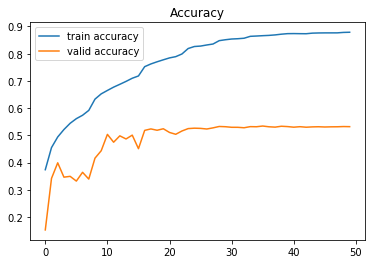

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()


## 結論：